# Logistic Regression & classification metrics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Sigmoid function

先簡單用圖形看一下 sigmoid function 與 logit 的關係。 

看當我們使用 a + b * x 去 fit logit時，改變 a 的值，和改變 b 的值，分別對sigmoid function有什麼影響。

In [2]:
def sigmoid(logit: np.ndarray) -> np.ndarray:
    """
    convert logit to probability

    Args:
        logit: A scalar, numpy array of any size.

    Returns:
        p: probability, with the same shape as logit
    """

    p = 1/(1+np.exp(-logit))

    return p

In [3]:
def logit(a, b, x):

    return a + b * x

### a 的影響

利用numpy的linspace生成-10到10之間的300個資料點：

In [4]:
x = np.linspace(-10, 10, 300)

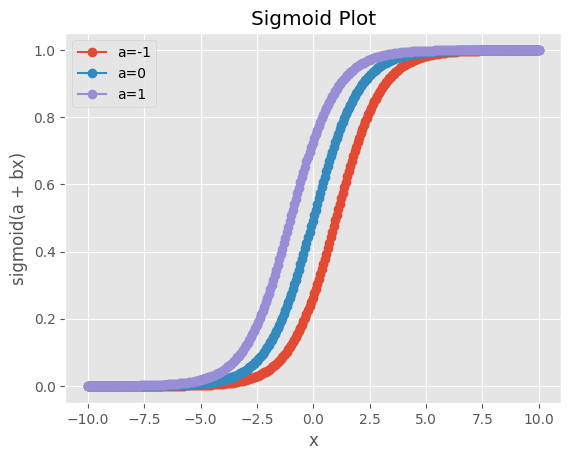

In [5]:
# Plot the sigmoid function
plt.figure()

# Set ggplot style
plt.style.use('ggplot')

b = 1
for a in [-1, 0, 1]:
    plt.plot(x, sigmoid(logit(a=a, b=b, x=x)), marker='o', label=f'a={a}')

# Set labels and title
plt.title("Sigmoid Plot")
plt.xlabel("x")
plt.ylabel("sigmoid(a + bx)")

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

可以注意到 a 的影響是會讓sigmoid function左右移動。

在這個例子中，當預測分類的門檻 = 0.5，若 a < 0，x的取值要大於0才會輸出預測分類為1；反之，若 a > 0 ，x的取值要小於0才會輸出預測分類為1。

### b 的影響

同樣生成300個資料點：

In [6]:
x = np.linspace(-10, 10, 300)

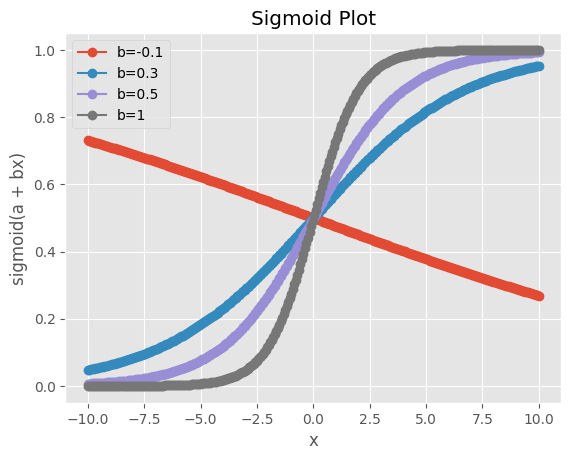

In [7]:
# Plot the sigmoid function
plt.figure()

# Set ggplot style
plt.style.use('ggplot')

a = 0
for b in [-0.1, 0.3, 0.5, 1]:
    plt.plot(x, sigmoid(logit(a=a, b=b, x=x)), marker='o', label=f'b={b}')

# Set labels and title
plt.title("Sigmoid Plot")
plt.xlabel("x")
plt.ylabel("sigmoid(a + bx)")

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

可以看到 b 會影響 sigmoid function S型的曲度。

在這個例子中，當 x 接近0時，b 越大，輸出機率的變化越大。

## Logistic Regression for classification

本次使用scikit-learn 的 breast cancer dataset。

該資料集的target紀錄的是腫瘤的分類，target=1為惡性(malignant)，target=0代表良性(benign)。

因此是一個分類問題，我們先用logistic regression來訓練看看。

首先一樣需讀入資料集。

In [8]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

觀察一下資料集發現feature有尺度差距過大的問題，這樣在做gradient descent的時候會比較沒有效率。

所以應該要做feature scaling。

In [9]:
X.mean(axis=0)

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

特別要注意的是，feature scaling必須在切割資料集之後才能執行。

否則部分testing data的資訊會洩漏到training dataset之中。

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

借助scikit-learn的StandardScaler來做特徵的標準化。

首先需要先初始化建立一個StandardScaler物件。

注意我們是對training data做```.fit_transform()```，但對testing data是做```.transform()```。

```.fit_transform()```代表同時做了 fit + transform 的動作，在這邊的意思是scaler物件會從資料中取得各特徵的平均值與標準差(fit)，然後才做標準化(transform)。

```.transform()```，則是只做transform，在這邊的意思是利用scaler從training data中fit好的平均值與標準差來進行標準化。

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


建立logistic regression，方法跟之前的做法都很像。

In [12]:
# Initialize logistic regression model
logreg = LogisticRegression()

# Train the model on the scaled training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

使用testing data進行預測，檢驗模型表現。

In [13]:
# Predictions on the test set
y_pred = logreg.predict(X_test_scaled)

這邊輸出的是預測的分類，0代表預測為良性腫瘤，1代表預測為惡性腫瘤。分類的門檻預設就是0.5。

In [14]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

可以利用scikit-learn的```confusion_matrix()```計算confusion matrix。

In [15]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix array into a pandas DataFrame
cm_df = pd.DataFrame(cm.T, index=['Predicted 0', 'Predicted 1'], columns=['Actual 0', 'Actual 1'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Actual 0  Actual 1
Predicted 0        41         1
Predicted 1         2        70


一樣借助scikit-learn就可以計算各種分類問題的衡量指標。

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

In [17]:
# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


可以自行手動進行驗算。

In [18]:
# ravel 可以把np.ndarray攤平
tn, fp, fn, tp = cm.ravel()

In [19]:
print('accuracy:', (tn + tp) / cm.sum())
print('precision:', tp / (tp + fp))
print('recall:', tp / (tp + fn))

accuracy: 0.9736842105263158
precision: 0.9722222222222222
recall: 0.9859154929577465


若要計算AUCROC以及AUCPR，必須要有預測機率。

所以這邊利用```.predict_proba()```方法來進行預測。

注意到，使用```.predict_proba()```會分別輸出分類為0的預測機率，以及分類為1的預測機率。所以必須取第二欄。

In [20]:
# Assuming logreg is your logistic regression model
y_score = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class

計算 AUCROC 以及 AUCPR 。

In [21]:
# Calculate AUCROC
auc_roc = roc_auc_score(y_test, y_score)  # y_score should be the predicted probabilities or decision function scores

# Calculate AUCPR
auc_pr = average_precision_score(y_test, y_score)  # y_score should be the predicted probabilities or decision function scores

In [22]:
# Print metrics
print("AUCROC:", auc_roc)
print("AUCPR:", auc_pr)

AUCROC: 0.99737962659679
AUCPR: 0.9983796759737475
